# Task 2: To Explore Supervised Learning
### Business Requirement: To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## Importing NumPy and Pandas Library
NumPy is a Linear Algebra Library in Python, which is used to perform various Numerical operations and Linear Algebra operations.

Pandas Library is another important library. It provide us facility to work with data from wide variety of sources in Tabular form. Padas Library is used for fast analysis, data cleaning and data preparation and also to perform EDA(Exploratory Data Analysis) tasks.

In [1]:
import numpy as np
import pandas as pd

## Importing Matplotlib and Seaborn Library
Malplotlib is a basic Data Visualization Library in Python. It is also known as the Grandfather library for all other Visualization Libraries in Python. It provides us great control on almost every aspect of figure.

Seaborn is an Advanced Data Visualization Library in Python and built on top of Matplotlib. It is a Statistical Plotting Library and it has a beautiful default style. Seaborn Library works very well with Pandas dataframe objects.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Note: %matplotlib inline is only used when working with Jupyter Notebook, and is used to display figures inside the notebook.

## 1. Importing and Understanding the Data
### 1.1 Reading DataSet

In [3]:
data = pd.read_csv('http://bit.ly/w-data')

### 1.2 explore the dataset

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

So, we can see that the size of the dataset is (25,2) which means we have 25 rows of data and 2 columns. These columns are Hours of Studies and Scores that the student got. And also we don't have any null values in the dataset.

## 2. Let's visualize the dataset

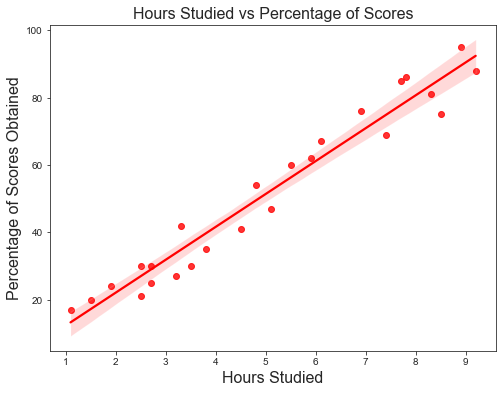

In [7]:
sns.set_style('ticks')
plt.figure(figsize=(8,6))
li = sns.regplot(x = 'Hours', y = 'Scores', data = data, color = 'red')
plt.title('Hours Studied vs Percentage of Scores', fontsize = 16)
plt.xlabel('Hours Studied', fontsize = 16)
plt.ylabel('Percentage of Scores Obtained', fontsize = 16)
plt.show()

Clearly we can see that there is a linear relation between the two columns and also we donot have any outliers in the data

## 3. Prepare the datasets for Model Building

Preparing the dataset for the supervised learning model building, ideally a dataset should be splitted into the training and test datasets so that we can train our model on the training data and evaluate our model's performance by using the test dataset.

But in our case since, the size of the dataset is too small so it is advisable not to split our dataset in the training and test datasets. Because if we do so then there is a high chance that our model instead of getting generalized on the training data it will get overfit on the dataset. It will cause high Training accuracy but low Prediction accuracy.

So, we will first train our model on the entire dataset and after that we will use the same dataset to evaluate our model performance.

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1]

'Hours studied' is our Predictor variable and 'Scores Obtained' is a Dependent variable

## 4. Building a Linear Model
We first need to import the Linear Regression model from sklearn library using which we'll perform the Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation
Let us Evaluate our Model

In [12]:
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_[0])

Intercept:  2.483673405373196
Coefficient:  9.775803390787472


We can see that we got the same Intercept and Coefficient when we are making our model using statsmodel.api

From the parameters that we get, our linear equation becomes:
Scores = 2.483673 + 9.775803*Hours

### Let's Visualize how well the model fit the data

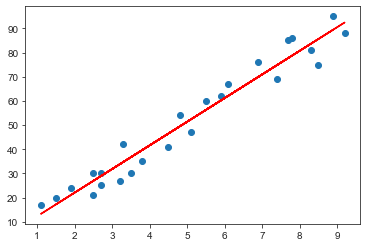

In [13]:
plt.scatter(X, y)
plt.plot(X, lr.intercept_ + lr.coef_*X, 'r')
plt.show()

## 5. Predictions on the Test Set
Now we will use the entier dataset as the test set.

In [14]:
y_pred = lr.predict(X)

In [15]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985


### Evaluate the Model
This step is performed to evaluate the performance of the model.

All of these are Loss Functions and we want to minimize them to make our model better.

In [16]:
from sklearn import metrics

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 4.972805319866375
Mean Squared Error: 28.88273050924546
Root Mean Squared Error: 5.374265578592619


#### We got the same result in both the models which we have created by using SKLearn library and statsmodel library

### 6. Predicting Scores
Now we can Predict the score which an individual can obtain in test

In [18]:
hours = 9.25
pred = lr.predict([[hours]])
print("No. of Hours of Studies: {}".format(hours))
print("Score that is Expected to get in Test: {}".format(round(pred[0],2)))

No. of Hours of Studies: 9.25
Score that is Expected to get in Test: 92.91


In [19]:
hours = [8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10]
for hour in hours:
    pred = lr.predict([[hour]])
    print("No. of Hours of Studies: {}".format(hour))
    print("Score that is Expected to get in Test: {}".format(round(pred[0],2)))
    print()

No. of Hours of Studies: 8
Score that is Expected to get in Test: 80.69

No. of Hours of Studies: 8.25
Score that is Expected to get in Test: 83.13

No. of Hours of Studies: 8.5
Score that is Expected to get in Test: 85.58

No. of Hours of Studies: 8.75
Score that is Expected to get in Test: 88.02

No. of Hours of Studies: 9
Score that is Expected to get in Test: 90.47

No. of Hours of Studies: 9.25
Score that is Expected to get in Test: 92.91

No. of Hours of Studies: 9.5
Score that is Expected to get in Test: 95.35

No. of Hours of Studies: 9.75
Score that is Expected to get in Test: 97.8

No. of Hours of Studies: 10
Score that is Expected to get in Test: 100.24

